# Text Classification - Graph Neural Network Analysis

----

## $\color{blue}{Sections:}$
* Preamble
* Load Results
* Scores
* Examination
* Save

## $\color{blue}{Preamble:}$

This notebook will analyse the results of the GNN model, it includes analysis of overall results, results for points connected to the graph, and results of issolated points.There is a big bonus for connected points, and a big loss for non connected points. =

## $\color{blue}{Load-Results:}$


In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/'

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'class/datasets/df_dev'
df = pd.read_pickle(path)

In [4]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal', 'mistral_ots_book',
       'mistral_ft_book', 'gpt_4o_mini_ft_book', 'gpt_4o_mini_book',
       'gpt_4o_mini_book_checkpoint', 'ner_responses', 'gcn_preds',
       'connected'],
      dtype='object')

In [5]:
grouped = dict(df.groupby("book_idx")['chapter_idx'].unique())

In [6]:
pred2book = {}
for key in grouped.keys():
  chapters = grouped[key]
  for chapter in chapters:
    pred2book[chapter] = key

In [17]:
df['gcn_pseudo_book'] = df['gcn_preds'].map(pred2book)
df['connected'] = [el.item() for el in df['connected']]

...saving

In [18]:
path = 'class/datasets/'
df.to_pickle(path + 'df_dev')

In [19]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal', 'mistral_ots_book',
       'mistral_ft_book', 'gpt_4o_mini_ft_book', 'gpt_4o_mini_book',
       'gpt_4o_mini_book_checkpoint', 'ner_responses', 'gcn_preds',
       'connected', 'gcn_pseudo_book'],
      dtype='object')

In [23]:
df_connected = df[df['connected']==True]
df_connected = df_connected.reset_index(drop=True)
df_issolated = df[df['connected']==False]
df_issolated = df_issolated.reset_index(drop=True)

## $\color{blue}{Scores:}$


In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [11]:
def bar_chart(values, cats, title):

    fig, ax = plt.subplots(1,1, figsize = (12,5))

    D_color = {
        0: '0',
        1: '0.5',
        2: '0.8',
        3: 'blue',
        4: 'red',
        5: 'green'

    }

    D_label = {
        0: "Uly1",
        1: "Uly2",
        2: "Uly3",
        3: "Dub",
        4: "Drac",
        5: "Rep"
    }

    ax.bar(
        x = list(range(len(values))),
        height = values,
        color = [D_color[el] for el in cats],
        edgecolor = 'black',
        zorder= 3,
        label= [D_label[el] for el in cats]  # Create a label for the legend

    )

    ax.grid(zorder=0,
            which='both',
            axis='y',
            linewidth=0.5,
            linestyle='--'
    )

    ax.yaxis.set_major_locator(plt.MaxNLocator())  # Show integer ticks


    # Create custom legend
    handles = [plt.Rectangle((0,0),1,1, color=D_color[i]) for i in D_color]
    labels = [D_label[i] for i in range(len(D_label))]
    ax.legend(handles, labels, title="Books", loc='upper right')


    # Add title
    plt.title(title)



    # Show the plot
    plt.show()


### $\color{red}{Chapter:}$

70 class problem


In [25]:
chapter_reals = df['chapter_idx'].to_numpy()
chapter_preds = df['gcn_preds'].to_numpy()

chapter_reals_c = df_connected['chapter_idx'].to_numpy()
chapter_preds_c = df_connected['gcn_preds'].to_numpy()

chapter_reals_i = df_issolated['chapter_idx'].to_numpy()
chapter_preds_i = df_issolated['gcn_preds'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [27]:
chapter_accuracy = round(accuracy_score(chapter_reals, chapter_preds),3)
chapter_accuracy_c = round(accuracy_score(chapter_reals_c, chapter_preds_c),3)
chapter_accuracy_i = round(accuracy_score(chapter_reals_i, chapter_preds_i),3)
print(f'overall accuracy: {chapter_accuracy}\nconnected_accuracy: {chapter_accuracy_c}\nissolated_accuract: {chapter_accuracy_i}')

overall accuracy: 0.592
connected_accuracy: 0.702
issolated_accuract: 0.502


#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_recall - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

macro precision: 0.5243398460685758
weighted precision: 0.6144002812888958
micro precision: 0.5923236514522822


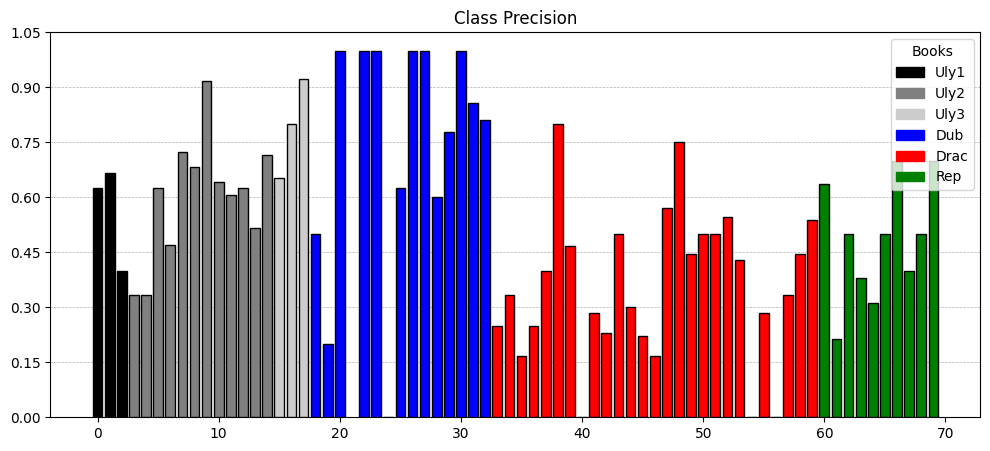

In [30]:
# overall results

chapter_precision = precision_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_precision = precision_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_precision = precision_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_precision = precision_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision)
print('weighted precision:', chapter_weighted_precision)
print('micro precision:', chapter_micro_precision)

#graph

vals = chapter_precision
cats = [pred2book[i] for i in range(70)]
title = "Class precision"
bar_chart(vals, cats, title)

macro precision: 0.6296131230314373
weighted precision: 0.7213461515562041
micro precision: 0.7018348623853211


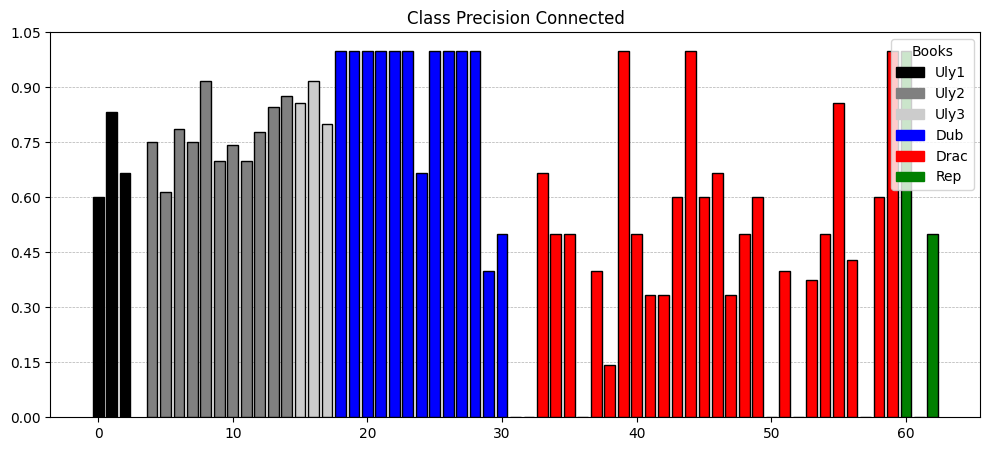

In [49]:
# connected results

chapter_precision_c = precision_score(chapter_reals_c, chapter_preds_c, average= None, zero_division=np.nan)
chapter_macro_precision_c = precision_score(chapter_reals_c, chapter_preds_c, average="macro", zero_division=np.nan)
chapter_weighted_precision_c = precision_score(chapter_reals_c, chapter_preds_c, average="weighted",zero_division=np.nan)
chapter_micro_precision_c = precision_score(chapter_reals_c, chapter_preds_c, average="micro",zero_division=np.nan)
print('macro precision:', chapter_macro_precision_c)
print('weighted precision:', chapter_weighted_precision_c)
print('micro precision:', chapter_micro_precision_c)

#graph

vals_c = chapter_precision_c
cats_c = []
cats_c = [pred2book[i] for i in range(65)]
title_c = "Class precision Connected"
bar_chart(vals_c, cats_c, title_c)

#### $\color{green}{Recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [50]:
chapter_recall = recall_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_recall = recall_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_recall = recall_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_recall = recall_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall)
print('weighted recall:', chapter_weighted_recall)
print('micro recall:', chapter_micro_recall)

macro recall: 0.5024360523160526
weighted recall: 0.5923236514522822
micro recall: 0.5923236514522822


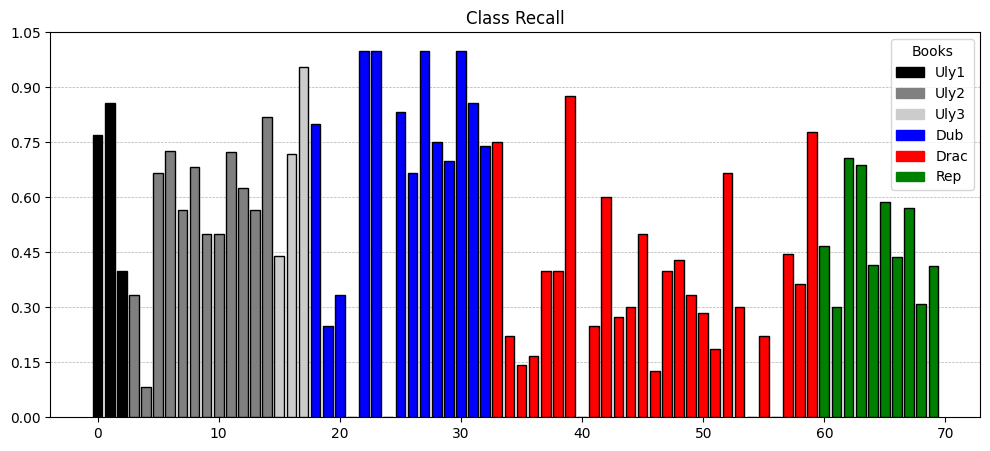

In [51]:
vals = chapter_recall
cats = [pred2book[i] for i in range(70)]
title = "Class Recall"
bar_chart(vals, cats, title)

macro recall: 0.6201514837797008
weighted recall: 0.7018348623853211
micro recall: 0.7018348623853211


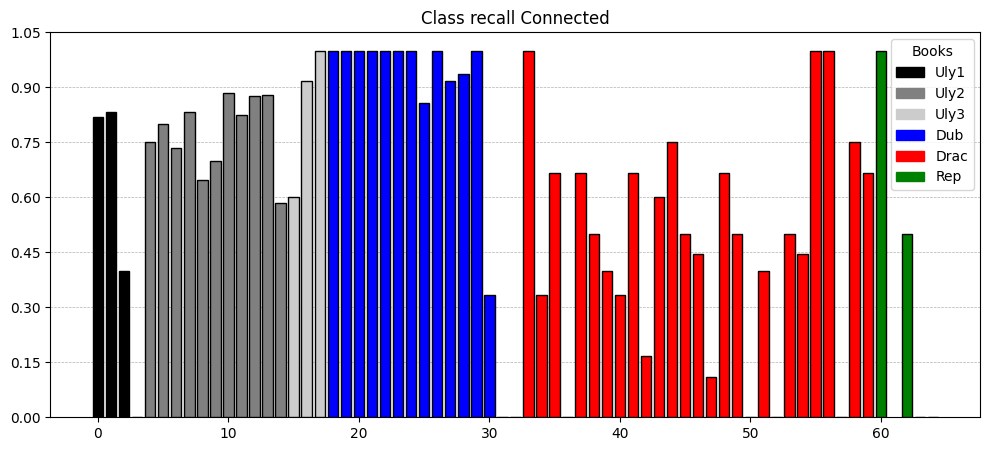

In [52]:
# connected results

chapter_recall_c = recall_score(chapter_reals_c, chapter_preds_c, average= None, zero_division=np.nan)
chapter_macro_recall_c = recall_score(chapter_reals_c, chapter_preds_c, average="macro", zero_division=np.nan)
chapter_weighted_recall_c = recall_score(chapter_reals_c, chapter_preds_c, average="weighted",zero_division=np.nan)
chapter_micro_recall_c = recall_score(chapter_reals_c, chapter_preds_c, average="micro",zero_division=np.nan)
print('macro recall:', chapter_macro_recall_c)
print('weighted recall:', chapter_weighted_recall_c)
print('micro recall:', chapter_micro_recall_c)

#graph

vals_c = chapter_recall_c
cats_c = []
cats_c = [pred2book[i] for i in range(65)]
title_c = "Class recall Connected"
bar_chart(vals_c, cats_c, title_c)

#### $\color{green}{F1:}$

Harmonic mean recall and recall

In [53]:
chapter_f1 = f1_score(chapter_reals, chapter_preds, average= None, zero_division=np.nan)
chapter_macro_f1 = f1_score(chapter_reals, chapter_preds, average="macro", zero_division=np.nan)
chapter_weighted_f1 = f1_score(chapter_reals, chapter_preds, average="weighted",zero_division=np.nan)
chapter_micro_f1 = f1_score(chapter_reals, chapter_preds, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1)
print('weighted f1:', chapter_weighted_f1)
print('micro f1:', chapter_micro_f1)


macro f1: 0.49010256869528174
weighted f1: 0.588404832724258
micro f1: 0.5923236514522822


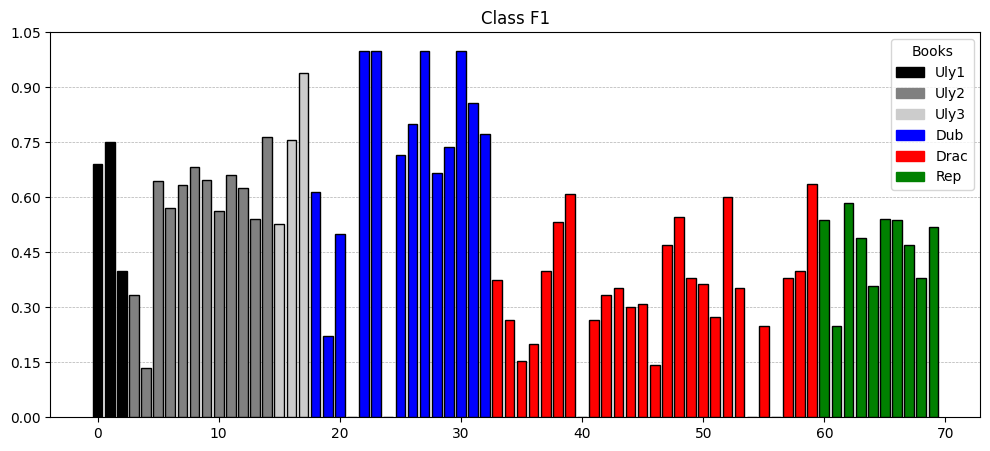

In [54]:
vals = chapter_f1
cats = [pred2book[i] for i in range(70)]
title = "Class F1"
bar_chart(vals, cats, title)

macro f1: 0.5892060608607306
weighted f1: 0.6945160560701267
micro f1: 0.7018348623853211


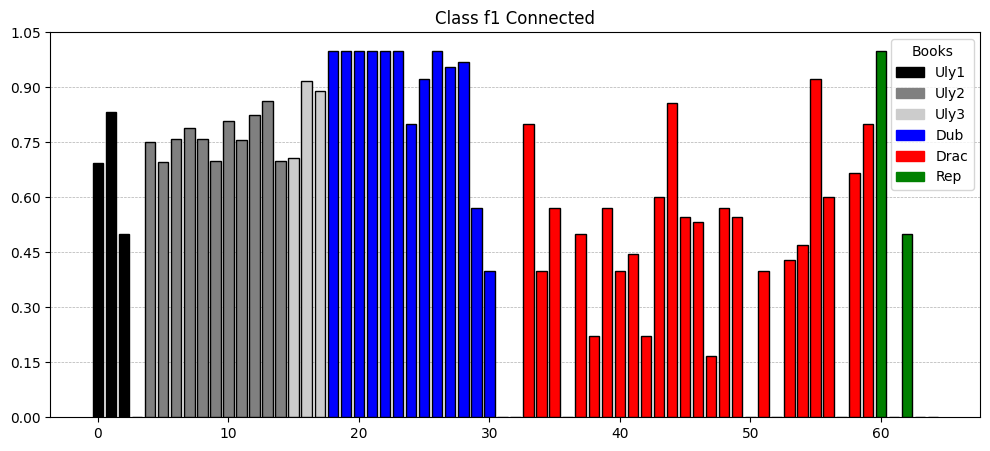

In [55]:
# connected results

chapter_f1_c = f1_score(chapter_reals_c, chapter_preds_c, average= None, zero_division=np.nan)
chapter_macro_f1_c = f1_score(chapter_reals_c, chapter_preds_c, average="macro", zero_division=np.nan)
chapter_weighted_f1_c = f1_score(chapter_reals_c, chapter_preds_c, average="weighted",zero_division=np.nan)
chapter_micro_f1_c = f1_score(chapter_reals_c, chapter_preds_c, average="micro",zero_division=np.nan)
print('macro f1:', chapter_macro_f1_c)
print('weighted f1:', chapter_weighted_f1_c)
print('micro f1:', chapter_micro_f1_c)

#graph

vals_c = chapter_f1_c
cats_c = []
cats_c = [pred2book[i] for i in range(65)]
title_c = "Class f1 Connected"
bar_chart(vals_c, cats_c, title_c)

#### $\color{green}{Confusion:}$

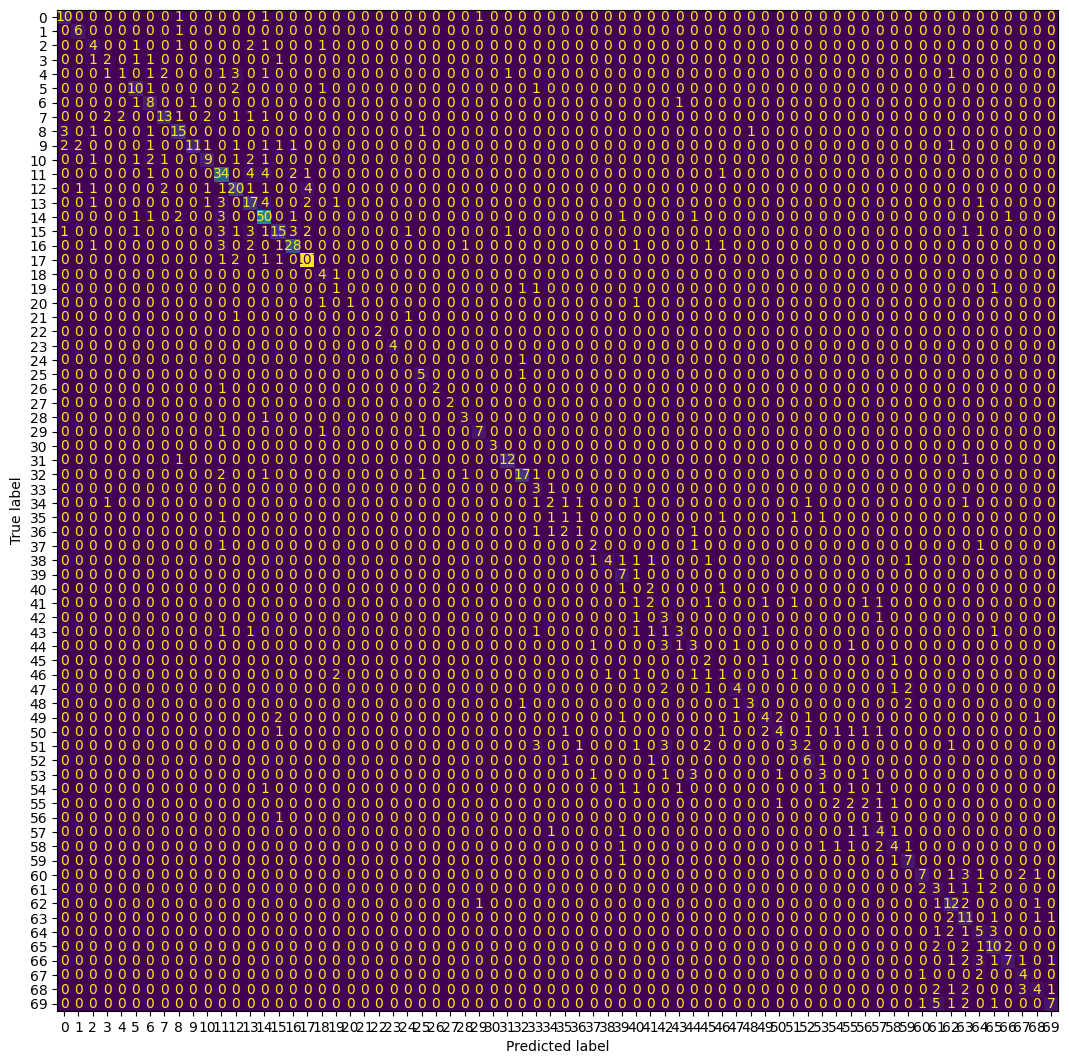

In [56]:
cm = confusion_matrix(chapter_reals, chapter_preds)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals, chapter_preds, colorbar=False, ax=ax)


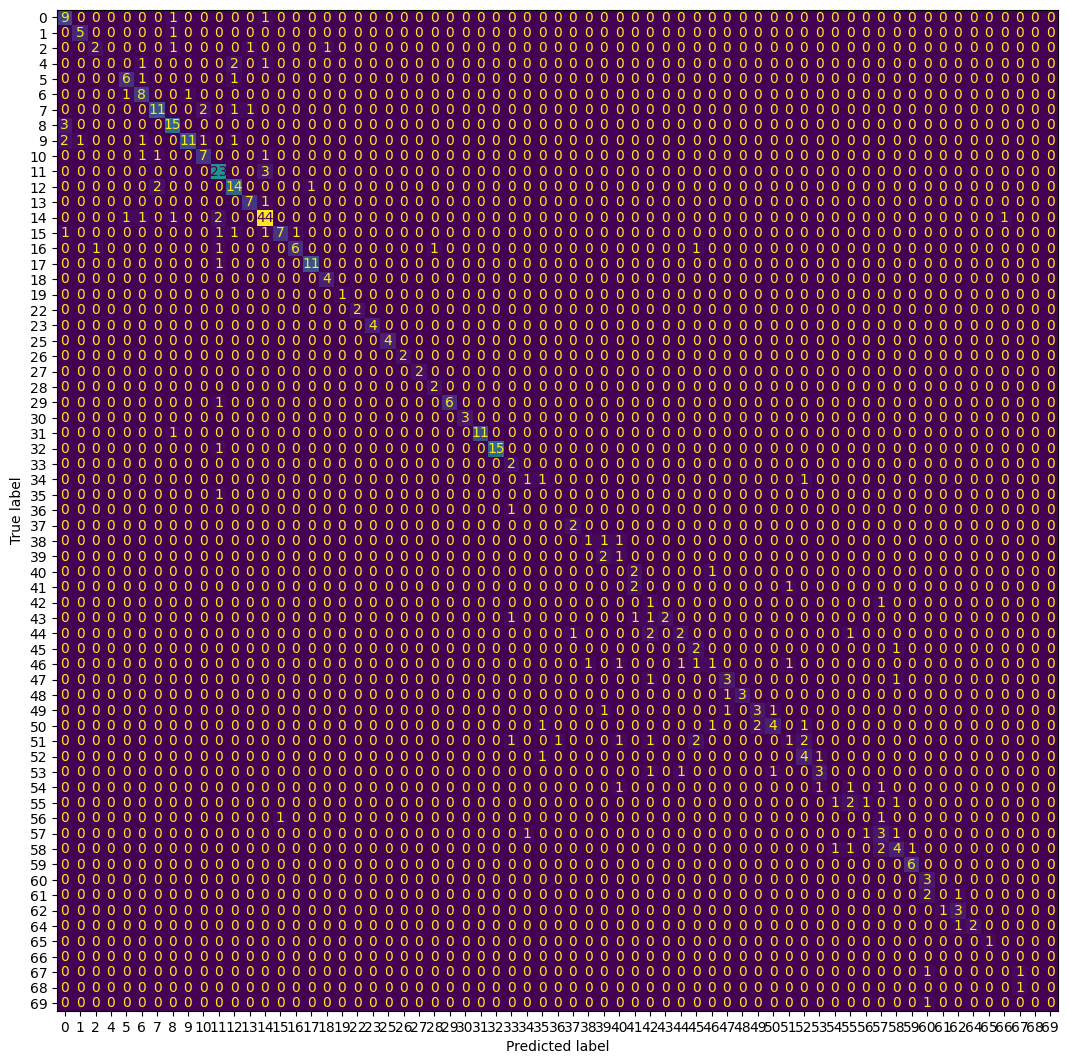

In [57]:
cm_c = confusion_matrix(chapter_reals_c, chapter_preds_c)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals_c, chapter_preds_c, colorbar=False, ax=ax)

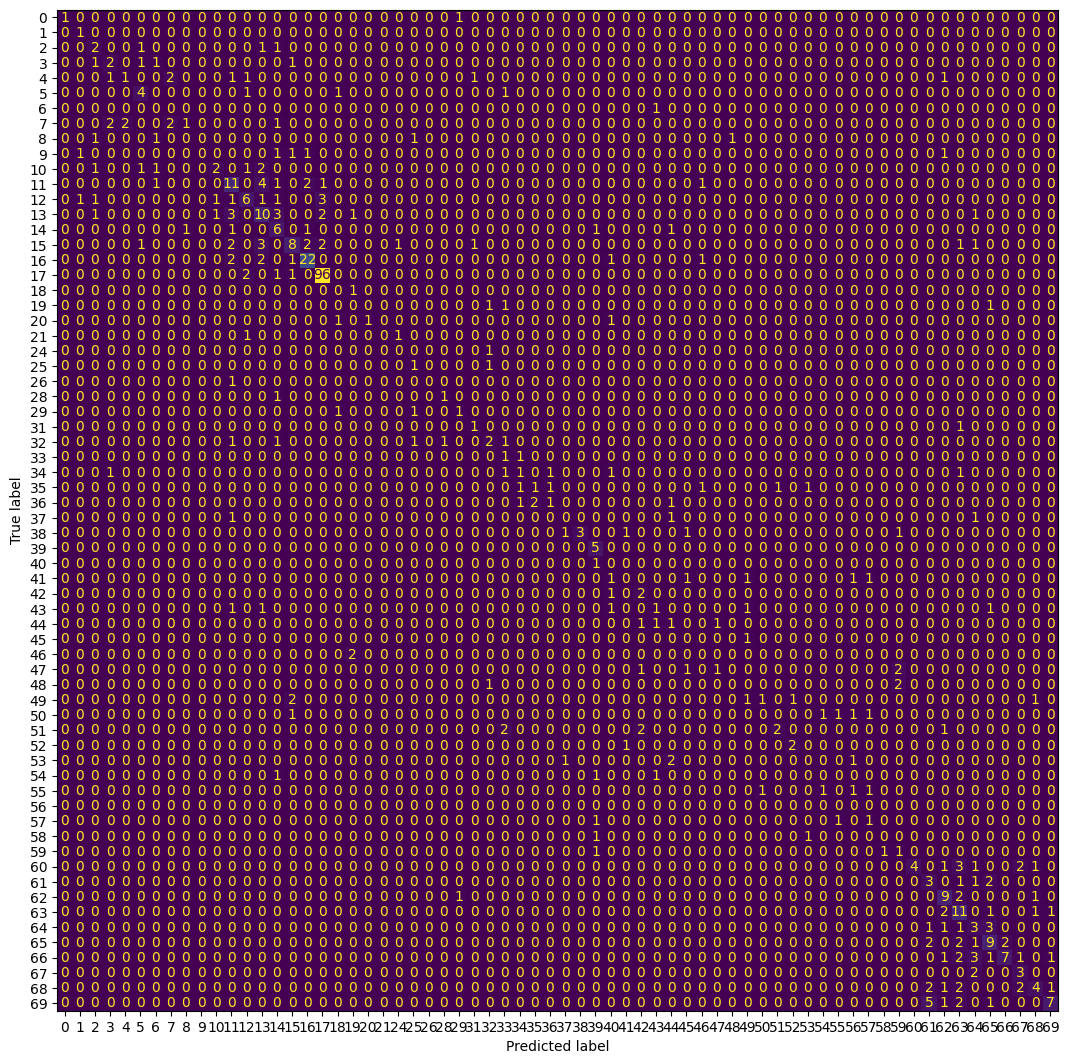

In [58]:
cm_i = confusion_matrix(chapter_reals_i, chapter_preds_i)
fig, ax = plt.subplots(figsize=(13,13))
cmp = ConfusionMatrixDisplay.from_predictions(chapter_reals_i, chapter_preds_i, colorbar=False, ax=ax)

### $\color{red}{Book:}$

6 class problem

In [60]:
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal', 'mistral_ots_book',
       'mistral_ft_book', 'gpt_4o_mini_ft_book', 'gpt_4o_mini_book',
       'gpt_4o_mini_book_checkpoint', 'ner_responses', 'gcn_preds',
       'connected', 'gcn_pseudo_book'],
      dtype='object')

In [79]:
book_reals = df['book_idx'].to_numpy()
book_preds = df['gcn_pseudo_book'].to_numpy()

book_reals_c = df_connected['book_idx'].to_numpy()
book_preds_c = df_connected['gcn_pseudo_book'].to_numpy()

book_reals_i = df_issolated['book_idx'].to_numpy()
book_preds_i = df_issolated['gcn_pseudo_book'].to_numpy()

#### $\color{green}{Accuracy:}$

$\frac{1}{N}\sum_{i=1}^N (y_{true} = y_{pred})$


In [80]:
book_accuracy = round(accuracy_score(book_reals, book_preds),3)
book_accuracy_c = round(accuracy_score(book_reals_c, book_preds_c),3)
book_accuracy_i = round(accuracy_score(book_reals_i, book_preds_i),3)
print(f'overall accuracy: {book_accuracy}\nconnected_accuracy: {book_accuracy_c}\nissolated_accuract: {book_accuracy_i}')

overall accuracy: 0.886
connected_accuracy: 0.936
issolated_accuract: 0.845


#### $\color{green}{Precision:}$

Proportion of predictions that are correct

$\frac{TP}{TP + FP}$

* class_precision - stat per class
* macro - average over classes
* weighted - macro weighted by class sizes
* micro - global average (count every true positive and false positive)

In [81]:
book_precision = precision_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_precision = precision_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_precision = precision_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_precision = precision_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision)
print('weighted precision:', book_weighted_precision)
print('micro precision:', book_micro_precision)

macro precision: 0.8413688632904094
weighted precision: 0.8877221836714678
micro precision: 0.8858921161825726


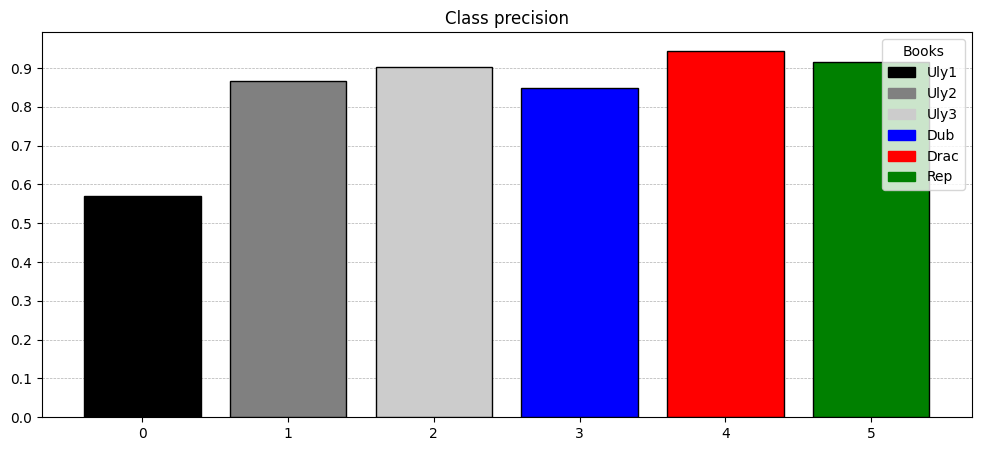

In [82]:
vals = book_precision
cats = [i for i in range(6)]
title = "Class precision"
bar_chart(vals, cats, title)

macro precision: 0.9038334699343205
weighted precision: 0.937161325806364
micro precision: 0.9357798165137615


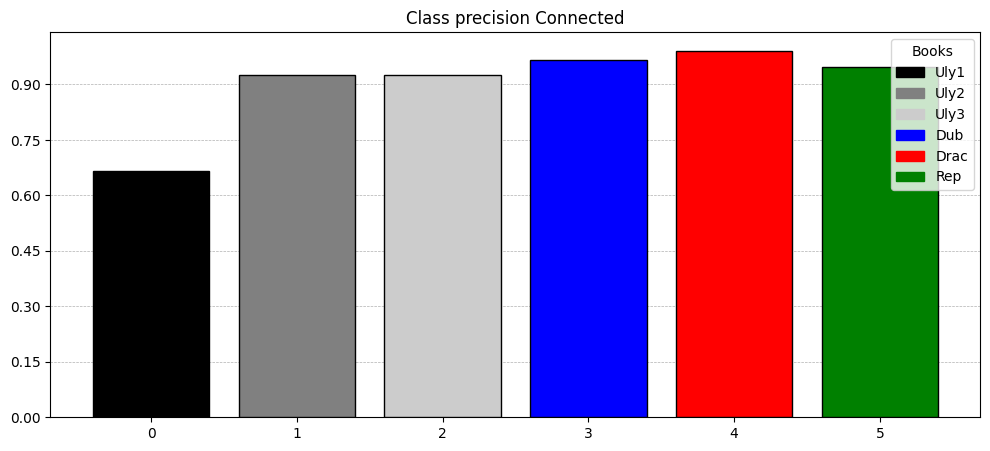

In [83]:
# connected results

book_precision_c = precision_score(book_reals_c, book_preds_c, average= None, zero_division=np.nan)
book_macro_precision_c = precision_score(book_reals_c, book_preds_c, average="macro", zero_division=np.nan)
book_weighted_precision_c = precision_score(book_reals_c, book_preds_c, average="weighted",zero_division=np.nan)
book_micro_precision_c = precision_score(book_reals_c, book_preds_c, average="micro",zero_division=np.nan)
print('macro precision:', book_macro_precision_c)
print('weighted precision:', book_weighted_precision_c)
print('micro precision:', book_micro_precision_c)

#graph

vals_c = book_precision_c
cats_c = []
cats_c = [i for i in range(6)]
title_c = "Class precision Connected"
bar_chart(vals_c, cats_c, title_c)

#### $\color{green}{recall:}$

Proportion of reals that are true.

$\frac{TP}{TP + FN}$


In [84]:
book_recall = recall_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_recall = recall_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_recall = recall_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_recall = recall_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall)
print('weighted recall:', book_weighted_recall)
print('micro recall:', book_micro_recall)

macro recall: 0.8571455434005989
weighted recall: 0.8858921161825726
micro recall: 0.8858921161825726


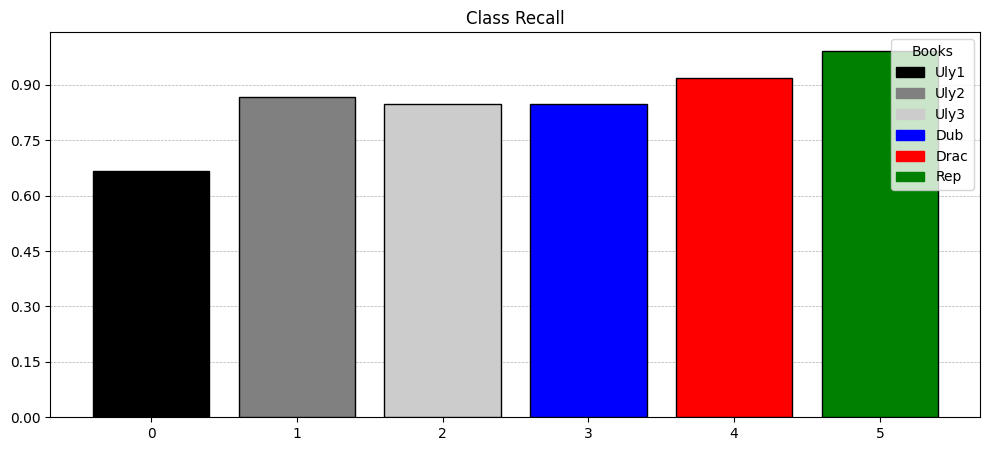

In [85]:
vals = book_recall
cats = [i for i in range(6)]
title = "Class Recall"
bar_chart(vals, cats, title)

macro recall: 0.8918894789385776
weighted recall: 0.9357798165137615
micro recall: 0.9357798165137615


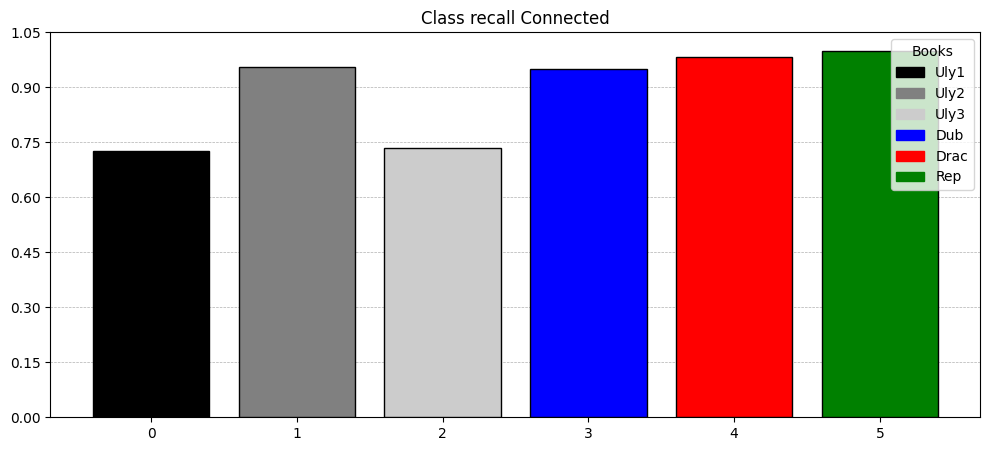

In [87]:
book_recall_c = recall_score(book_reals_c, book_preds_c, average= None, zero_division=np.nan)
book_macro_recall_c = recall_score(book_reals_c, book_preds_c, average="macro", zero_division=np.nan)
book_weighted_recall_c = recall_score(book_reals_c, book_preds_c, average="weighted",zero_division=np.nan)
book_micro_recall_c = recall_score(book_reals_c, book_preds_c, average="micro",zero_division=np.nan)
print('macro recall:', book_macro_recall_c)
print('weighted recall:', book_weighted_recall_c)
print('micro recall:', book_micro_recall_c)

#graph

vals_c = book_recall_c
cats_c = []
cats_c = [i for i in range(6)]
title_c = "Class recall Connected"
bar_chart(vals_c, cats_c, title_c)

#### $\color{green}{F1:}$

Harmonic mean recall and recall

In [88]:
book_f1 = f1_score(book_reals, book_preds, average= None, zero_division=np.nan)
book_macro_f1 = f1_score(book_reals, book_preds, average="macro", zero_division=np.nan)
book_weighted_f1 = f1_score(book_reals, book_preds, average="weighted",zero_division=np.nan)
book_micro_f1 = f1_score(book_reals, book_preds, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1)
print('weighted f1:', book_weighted_f1)
print('micro f1:', book_micro_f1)

macro f1: 0.8482126437351635
weighted f1: 0.8862615920571891
micro f1: 0.8858921161825726


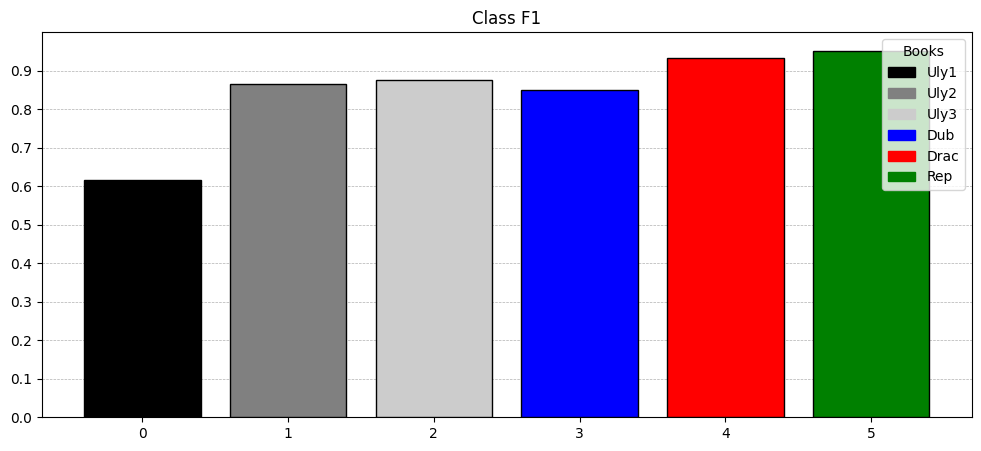

In [89]:
vals = book_f1
cats = [i for i in range(6)]
title = "Class F1"
bar_chart(vals, cats, title)

macro f1: 0.8956450248495079
weighted f1: 0.9354047923886708
micro f1: 0.9357798165137615


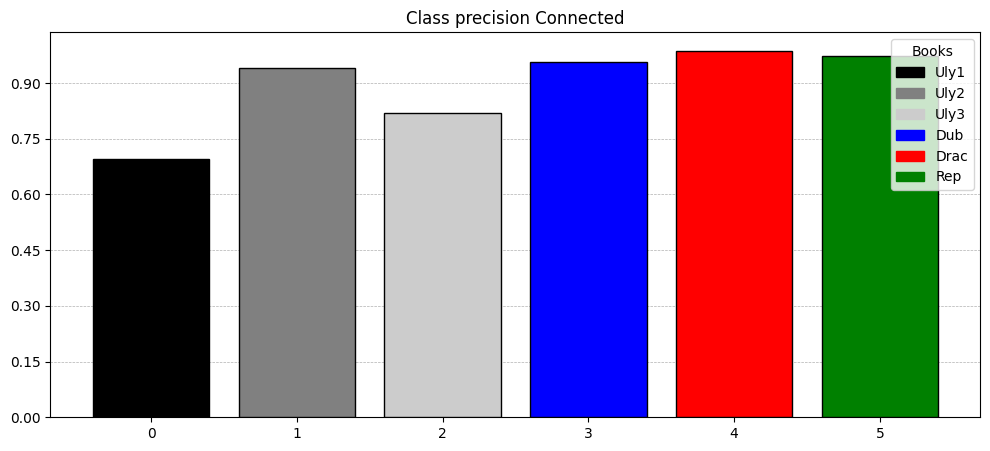

In [90]:
book_f1_c = f1_score(book_reals_c, book_preds_c, average= None, zero_division=np.nan)
book_macro_f1_c = f1_score(book_reals_c, book_preds_c, average="macro", zero_division=np.nan)
book_weighted_f1_c = f1_score(book_reals_c, book_preds_c, average="weighted",zero_division=np.nan)
book_micro_f1_c = f1_score(book_reals_c, book_preds_c, average="micro",zero_division=np.nan)
print('macro f1:', book_macro_f1_c)
print('weighted f1:', book_weighted_f1_c)
print('micro f1:', book_micro_f1_c)

#graph

vals_c = book_f1_c
cats_c = []
cats_c = [i for i in range(6)]
title_c = "Class precision Connected"
bar_chart(vals_c, cats_c, title_c)

#### $\color{green}{Confusion:}$

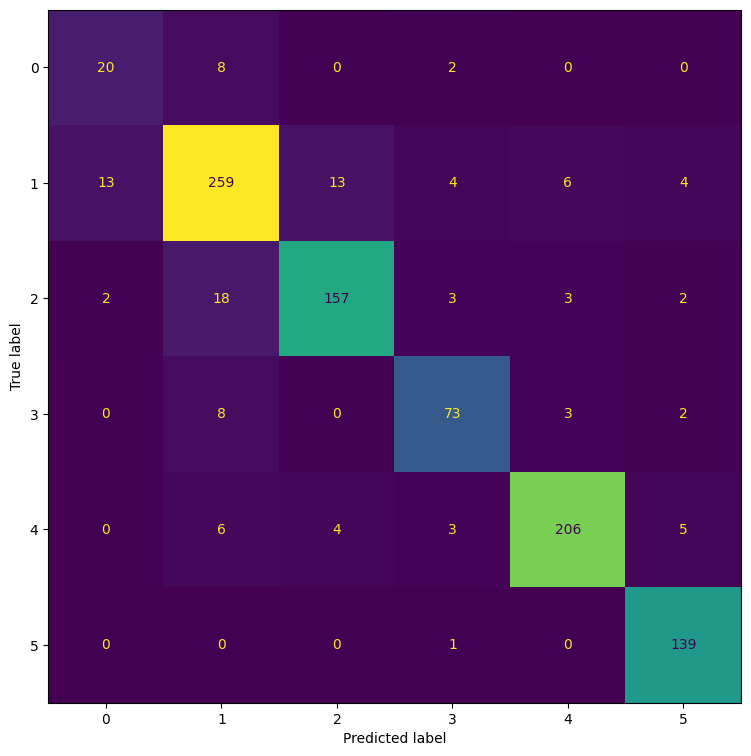

In [91]:
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals, book_preds, colorbar=False, ax=ax)

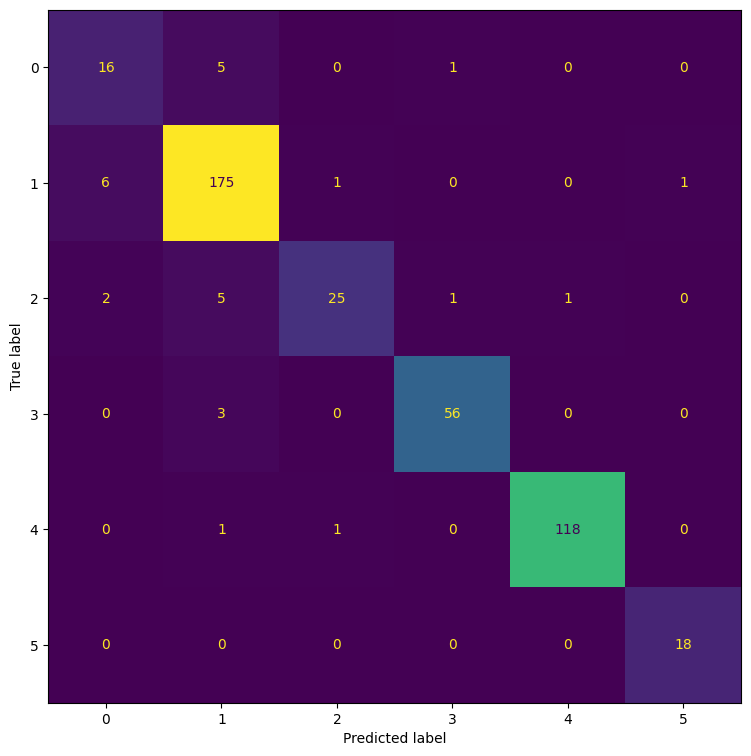

In [92]:
# connected
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals_c, book_preds_c, colorbar=False, ax=ax)

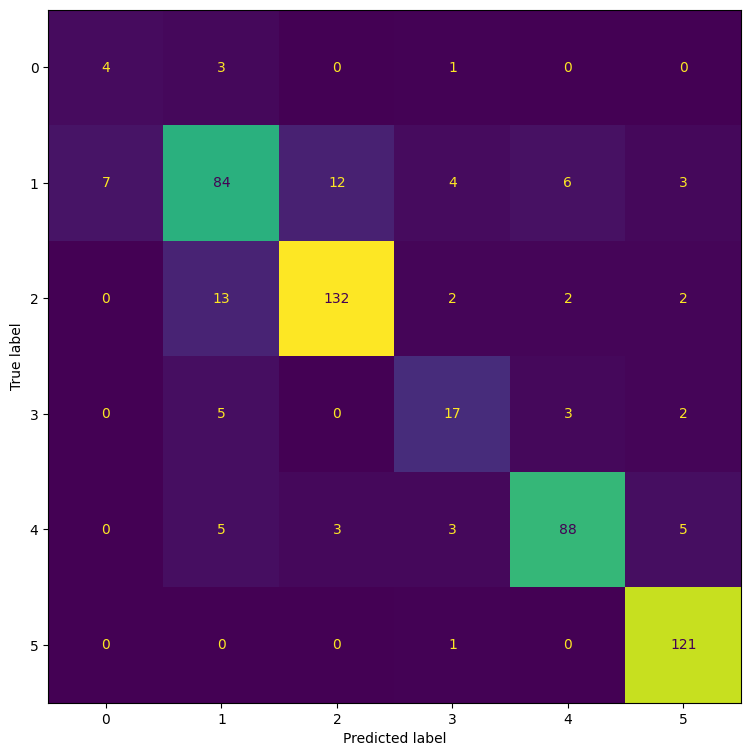

In [93]:
# issolated
fig, ax = plt.subplots(figsize=(9,9))
cmp = ConfusionMatrixDisplay.from_predictions(book_reals_i, book_preds_i, colorbar=False, ax=ax)

## $\color{blue}{Examination:}$

In [94]:
# subset incorrect and view
df.columns

Index(['index', 'master', 'book_idx', 'book', 'chapter_idx', 'chapter',
       'author', 'content', 'vanilla_embedding', 'vanilla_preds',
       'vanilla_pseudo_book', 'vanilla_moe_e2e_soft_preds',
       'vanilla_moe_e2e_soft_pseudo_book', 'vanilla_moe_e2e_hard_preds',
       'vanilla_moe_e2e_hard_pseudo_book', 'vanilla_moe_e2e_soft_forest_preds',
       'vanilla_moe_e2e_soft_forest_pseudo_book', 'vanilla_moe_hard_pre_preds',
       'vanilla_moe_hard_pre_pseudo_book', 'vanilla_embedding.1',
       'direct_ft_preds', 'direct_ft_pseudo_book', 'ft_embedding',
       'embedding_ft_preds', 'embedding_ft_pseudo_book', 'direct_ft_moe_preds',
       'direct_ft_moe_pseudo_book', 'ft_embedding_pal', 'mistral_ots_book',
       'mistral_ft_book', 'gpt_4o_mini_ft_book', 'gpt_4o_mini_book',
       'gpt_4o_mini_book_checkpoint', 'ner_responses', 'gcn_preds',
       'connected', 'gcn_pseudo_book'],
      dtype='object')

In [97]:
df_wrong_book = df[df.book_idx != df.gcn_pseudo_book]
df_wrong_book = df_wrong_book.reset_index(drop=True)
df_wrong_book.shape

(110, 37)

In [98]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_book.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_book.loc[ind]["book_idx"]}, Chapter: {df_wrong_book.loc[ind]["chapter_idx"]}')
  print(df_wrong_book.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_book.loc[ind]["vanilla_moe_e2e_soft_pseudo_book"]}, Chapter: {df_wrong_book.loc[ind]["vanilla_moe_e2e_soft_preds"]}')


 ------
Book: 1, Chapter: 12
f offered like those skirtdancers behaving so immodest before gentlemen looking
Pred Book: 2, Chapter: 17

 ------
Book: 4, Chapter: 54
“Now suppose that you were, in truth, the owner of that house, and could not still get in; and think there was to you no conscience of the housebreaker, what would you do?” “I should get a respectable locksmith, and set him to work to pick the lock for me.” “And your police, they would interfere, would they not?” “Oh, no!
Pred Book: 4, Chapter: 54

 ------
Book: 4, Chapter: 46
I had got him the morning papers and the London papers of the previous night, and while we were talking at the carriage window, waiting for the train to start, he was turning them over. His eyes suddenly seemed to catch something in one of them, “The Westminster Gazette”—I knew it by the colour—and he grew quite white.
Pred Book: 4, Chapter: 46

 ------
Book: 2, Chapter: 16
apprehension of opposition from extreme circles on the questions of the respe

<ipython-input-98-8e2998a603e7>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_book.shape[0],1))


In [102]:
df_wrong_chapter = df[df.chapter_idx != df.gcn_preds]
df_wrong_chapter = df_wrong_chapter.reset_index(drop=True)
df_wrong_chapter.shape

(393, 37)

In [103]:
for i in range(10):
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))
  print('\n ------')
  print(f'Book: {df_wrong_chapter.loc[ind]["book_idx"]}, Chapter/ {df_wrong_chapter.loc[ind]["chapter_idx"]}')
  print(df_wrong_chapter.loc[ind]['content'])
  print(f'Pred Book: {df_wrong_chapter.loc[ind]["gcn_pseudo_book"]}, Chapter: {df_wrong_chapter.loc[ind]["gcn_preds"]}')


 ------
Book: 1, Chapter/ 7
Show this gentleman the door.   Ah.   His hand fell to his side again.   Never know anything about it. Waste of time. Gasballs spinning about, crossing each other, passing. Same old dingdong always. Gas: then solid: then world: then cold: then dead shell drifting around, frozen rock, like that pineapple rock.
Pred Book: 1, Chapter: 4

 ------
Book: 2, Chapter/ 17
d her to wear them I suppose she was pious because no man would look at her twic
Pred Book: 1, Chapter: 12

 ------
Book: 4, Chapter/ 49
One of them added that it was hard lines that there wasn’t any gentleman “such-like as yourself, squire,” to show some sort of appreciation of their efforts in a liquid form; another put in a rider that the thirst then generated was such that even the time which had elapsed had not completely allayed it.
Pred Book: 2, Chapter: 15

 ------
Book: 4, Chapter/ 40
Mr. Hawkins sent me on the letter, and wrote himself, oh, so kindly. I am to leave in the morning and go o

<ipython-input-103-0c2a516460cd>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind = int(np.random.choice(df_wrong_chapter.shape[0],1))


## $\color{blue}{Examination:}$

In [108]:
D = {
    'model': ["gcn","gcn_connected"],
    'params': [2670638, 2670638],
    'book_accuracy' : [book_accuracy, book_accuracy_c],
    'book_precision': [list(book_precision), list(book_precision_c)],
    'book_macro_precision': [book_macro_precision, book_macro_precision_c],
    'book_weighted_precision': [book_weighted_precision, book_weighted_precision_c],
    'book_recall': [list(book_recall),list(book_recall_c)],
    'book_macro_recall': [book_macro_recall, book_macro_recall_c],
    'book_weighted_recall': [book_weighted_recall, book_weighted_recall_c],
    'book_f1': [list(book_f1),list(book_f1_c)],
    'book_macro_f1':[book_macro_f1, book_macro_f1_c],
    'book_weighted_f1': [book_weighted_f1, book_weighted_f1_c],
        'chapter_accuracy' : [chapter_accuracy, chapter_accuracy_c],
    'chapter_precision': [list(chapter_precision), list(chapter_precision_c)],
    'chapter_macro_precision': [chapter_macro_precision, chapter_macro_precision_c],
    'chapter_weighted_precision': [chapter_weighted_precision, chapter_weighted_precision_c],
    'chapter_recall': [list(chapter_recall), list(chapter_recall_c)],
    'chapter_macro_recall': [chapter_macro_recall, chapter_macro_recall_c],
    'chapter_weighted_recall': [chapter_weighted_recall, chapter_weighted_recall_c],
    'chapter_f1': [list(chapter_f1), list(chapter_f1_c)],
    'chapter_macro_f1':[chapter_macro_f1, chapter_macro_f1_c],
    'chapter_weighted_f1': [chapter_weighted_f1, chapter_weighted_f1_c],
}

In [111]:
path = "class/results/"
df_res = pd.read_pickle(path + "master_results.pk")

In [112]:
df_new = pd.DataFrame(D)

In [113]:
df_res = pd.concat([df_res, df_new], ignore_index=True)

In [114]:
df_res

,model,params,book_accuracy,book_precision,book_macro_precision,book_weighted_precision,book_recall,book_macro_recall,book_weighted_recall,book_f1,...,chapter_accuracy,chapter_precision,chapter_macro_precision,chapter_weighted_precision,chapter_recall,chapter_macro_recall,chapter_weighted_recall,chapter_f1,chapter_macro_f1,chapter_weighted_f1
0,vanilla,403070,0.883817,"[0.68, 0.8673469387755102, 0.8691099476439791,...",0.854691,0.882319,"[0.5666666666666667, 0.8528428093645485, 0.897...",0.836373,0.883817,"[0.6181818181818182, 0.8600337268128162, 0.882...",...,0.596473,"[0.6428571428571429, 0.8, 0.5, 0.3, 0.6, 0.714...",0.540711,0.614420,"[0.6923076923076923, 0.5714285714285714, 0.3, ...",0.502501,0.596473,"[0.6666666666666666, 0.6666666666666666, 0.375...",0.492163,0.592659
1,vanilla_moe_e2e_soft,1308029,0.879668,"[0.6, 0.872852233676976, 0.8601036269430051, 0...",0.842570,0.879652,"[0.6, 0.8494983277591973, 0.8972972972972973, ...",0.843171,0.879668,"[0.6, 0.8610169491525423, 0.8783068783068783, ...",...,0.618257,"[0.5882352941176471, 0.6666666666666666, 0.571...",0.560280,0.635325,"[0.7692307692307693, 0.5714285714285714, 0.4, ...",0.541950,0.618257,"[0.6666666666666666, 0.6153846153846154, 0.470...",0.536712,0.617050
2,vanilla_moe_e2e_hard,1308029,0.879668,"[0.6129032258064516, 0.8491803278688524, 0.857...",0.845688,0.880934,"[0.6333333333333333, 0.8662207357859532, 0.875...",0.846277,0.879668,"[0.6229508196721312, 0.8576158940397351, 0.866...",...,0.596473,"[0.6666666666666666, 0.5555555555555556, 0.4, ...",0.528659,0.612263,"[0.6153846153846154, 0.7142857142857143, 0.4, ...",0.526583,0.596473,"[0.64, 0.625, 0.4, 0.6666666666666666, 0.38095...",0.506712,0.592210
3,vanilla_moe_e2e_soft_forest,3061832,0.870332,"[0.6296296296296297, 0.8448844884488449, 0.877...",0.834169,0.869344,"[0.5666666666666667, 0.8561872909698997, 0.848...",0.826442,0.870332,"[0.5964912280701754, 0.8504983388704319, 0.862...",...,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.571...",0.468744,0.565878,"[0.6923076923076923, 0.5714285714285714, 0.4, ...",0.455724,0.553942,"[0.6923076923076923, 0.5714285714285714, 0.470...",0.441130,0.549578
4,vanilla_moe_hard_pre,1308029,0.857884,"[0.5641025641025641, 0.8614864864864865, 0.862...",0.810109,0.862754,"[0.7333333333333333, 0.8528428093645485, 0.848...",0.839826,0.857884,"[0.6376811594202898, 0.8571428571428571, 0.855...",...,0.566390,"[0.6875, 0.6666666666666666, 0.352941176470588...",0.476456,0.590392,"[0.8461538461538461, 0.5714285714285714, 0.6, ...",0.457954,0.566390,"[0.7586206896551724, 0.6153846153846154, 0.444...",0.436410,0.559260
5,direct_ft,109885310,0.902490,"[0.75, 0.896551724137931, 0.8835978835978836, ...",0.879199,0.901942,"[0.7, 0.8695652173913043, 0.9027027027027027, ...",0.876884,0.902490,"[0.7241379310344828, 0.8828522920203735, 0.893...",...,0.613071,"[0.75, 0.7777777777777778, 0.6666666666666666,...",0.540205,0.624456,"[0.9230769230769231, 1.0, 0.2, 0.3333333333333...",0.540334,0.613071,"[0.8275862068965517, 0.875, 0.3076923076923077...",0.522846,0.607524
6,embedding_ft,109885310,0.878631,"[nan, 0.8646616541353384, 0.7213114754098361, ...",0.893996,0.888122,"[0.0, 0.7692307692307693, 0.9513513513513514, ...",0.777679,0.878631,"[0.0, 0.8141592920353983, 0.8205128205128205, ...",...,0.383817,"[nan, nan, nan, nan, nan, 0.2608695652173913, ...",0.328969,0.433432,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.30434782...",0.282326,0.383817,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.3157894736842105, ...",0.225104,0.335905
7,direct_ft_moe,110790269,0.925311,"[0.6388888888888888, 0.9328621908127208, 0.949...",0.884559,0.927123,"[0.7666666666666667, 0.882943143812709, 0.9189...",0.905736,0.925311,"[0.696969696969697, 0.9072164948453608, 0.9340...",...,0.628631,"[0.7142857142857143, 0.5833333333333334, 0.5, ...",0.543312,0.661087,"[0.7692307692307693, 1.0, 0.5, 0.6666666666666...",0.543674,0.628631,"[0.7407407407407407, 0.7368421052631579, 0.5, ...",0.522084,0.632317
8,gcn,2670638,0.886000,"[0.571428571428571

In [116]:
# path = "class/results/"
# df_res.to_pickle(path + "master_results.pk")

In [117]:
check = pd.read_pickle("class/datasets/df_train") #33 - 59

In [118]:
all = df_res.loc[1]

In [119]:
f1 = all['chapter_recall']

In [120]:
import numpy as mp
np.mean(f1)

0.5419499096930777